# TODO
## 1. Find the right slice number for all the data
## 2. If the slice # is less than the required size, then add zero values to the rest of the slices of the scan and the label to the determined common size
## 3. Create a data processing pipeline for data augmentation
- Use a dataframe to replicate the existing data after train test split
- Use a augment mode (eg:"rotate","filters") to make vartiations in the data

In [2]:
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from celluloid import Camera

In [3]:
ROOT = "Task06_Lung"
TRAIN_DATA_PATH = ROOT + "/imagesTr/"
TRAIN_LABEL_PATH = ROOT + "/labelsTr/"

In [4]:
ct = nib.load('Task06_Lung/imagesTr/lung_001.nii.gz').get_fdata()
mask = nib.load('Task06_Lung/labelsTr/lung_001.nii.gz').get_fdata()

In [5]:
ct.shape

(512, 512, 304)

In [6]:
mask.shape

(512, 512, 304)

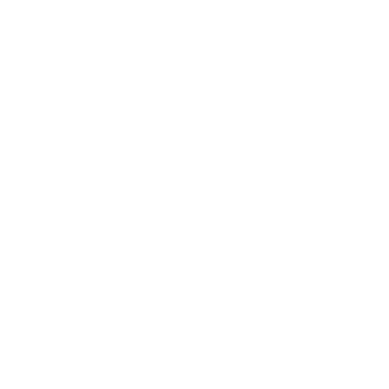

In [7]:
fig = plt.figure()
camera = Camera(fig)

for i in range(0, ct.shape[2], 2):  # axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    # mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    # plt.imshow(mask_, alpha=0.5, cmap="autumn")
    plt.axis("off")
    camera.snap()

animation = camera.animate()  

In [8]:
from IPython.display import HTML
HTML(animation.to_html5_video())

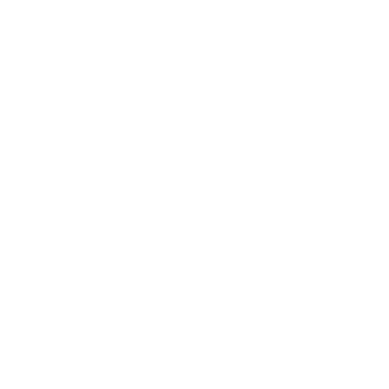

In [9]:
fig = plt.figure()
camera = Camera(fig)

for i in range(0, mask.shape[2], 2):  # axial view
    plt.imshow(mask[:,:,i], cmap="bone")
    # mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    # plt.imshow(mask_, alpha=0.5, cmap="autumn")
    plt.axis("off")
    camera.snap()

animation = camera.animate()  

In [10]:
from IPython.display import HTML
HTML(animation.to_html5_video())

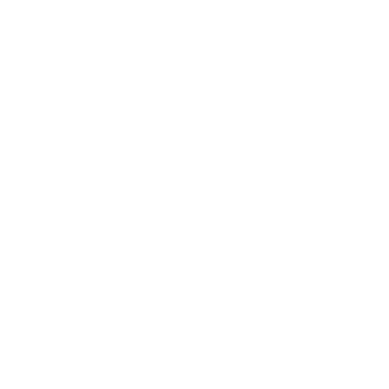

In [11]:
fig = plt.figure()
camera = Camera(fig)

for i in range(0, ct.shape[2], 2):  # axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5, cmap="autumn")
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())

In [18]:
import os

low = 0
for root, dirs, files in os.walk(TRAIN_DATA_PATH):
    for file in files:
        if not file.startswith("._"):
            mask = nib.load(TRAIN_LABEL_PATH + file).get_fdata()
            for i in range(mask.shape[2]):
                if mask[:, :, i].sum() > 0:
                    t = i
                    print(file, mask.shape, i)
                    break
            if low == 0:
                low = t
            elif t < low:
                low = t

print(low)

lung_061.nii.gz (512, 512, 211) 87
lung_095.nii.gz (512, 512, 231) 99
lung_055.nii.gz (512, 512, 242) 144
lung_044.nii.gz (512, 512, 282) 135
lung_010.nii.gz (512, 512, 241) 87
lung_027.nii.gz (512, 512, 264) 77
lung_048.nii.gz (512, 512, 322) 128
lung_020.nii.gz (512, 512, 314) 208
lung_047.nii.gz (512, 512, 636) 521
lung_041.nii.gz (512, 512, 240) 146
lung_028.nii.gz (512, 512, 251) 87
lung_023.nii.gz (512, 512, 531) 364
lung_029.nii.gz (512, 512, 255) 204
lung_006.nii.gz (512, 512, 567) 447
lung_004.nii.gz (512, 512, 276) 217
lung_045.nii.gz (512, 512, 252) 105
lung_079.nii.gz (512, 512, 251) 153
lung_005.nii.gz (512, 512, 329) 155
lung_092.nii.gz (512, 512, 245) 106
lung_074.nii.gz (512, 512, 369) 259
lung_057.nii.gz (512, 512, 112) 46
lung_025.nii.gz (512, 512, 376) 219
lung_064.nii.gz (512, 512, 248) 119
lung_015.nii.gz (512, 512, 277) 149
lung_093.nii.gz (512, 512, 228) 121
lung_059.nii.gz (512, 512, 218) 125
lung_043.nii.gz (512, 512, 129) 95
lung_083.nii.gz (512, 512, 256) 105

In [11]:
import os

count = 0
for root, dirs, files in os.walk(TRAIN_DATA_PATH):
    for file in files:
        if not file.startswith("._"):
            mask = nib.load(TRAIN_DATA_PATH + file).get_fdata()
            if mask.shape != (512, 512, 304):
                count += 1
                print(mask.shape, file, count)

(512, 512, 211) lung_061.nii.gz 1
(512, 512, 231) lung_095.nii.gz 2
(512, 512, 242) lung_055.nii.gz 3
(512, 512, 282) lung_044.nii.gz 4
(512, 512, 241) lung_010.nii.gz 5
(512, 512, 264) lung_027.nii.gz 6
(512, 512, 322) lung_048.nii.gz 7
(512, 512, 314) lung_020.nii.gz 8
(512, 512, 636) lung_047.nii.gz 9
(512, 512, 240) lung_041.nii.gz 10
(512, 512, 251) lung_028.nii.gz 11
(512, 512, 531) lung_023.nii.gz 12
(512, 512, 255) lung_029.nii.gz 13
(512, 512, 567) lung_006.nii.gz 14
(512, 512, 276) lung_004.nii.gz 15
(512, 512, 252) lung_045.nii.gz 16
(512, 512, 251) lung_079.nii.gz 17
(512, 512, 329) lung_005.nii.gz 18
(512, 512, 245) lung_092.nii.gz 19
(512, 512, 369) lung_074.nii.gz 20
(512, 512, 112) lung_057.nii.gz 21
(512, 512, 376) lung_025.nii.gz 22
(512, 512, 248) lung_064.nii.gz 23
(512, 512, 277) lung_015.nii.gz 24
(512, 512, 228) lung_093.nii.gz 25
(512, 512, 218) lung_059.nii.gz 26
(512, 512, 129) lung_043.nii.gz 27
(512, 512, 256) lung_083.nii.gz 28
(512, 512, 266) lung_070.nii.

In [12]:
import os

count = 0
for root, dirs, files in os.walk(TRAIN_LABEL_PATH):
    for file in files:
        if not file.startswith("._"):
            ct = nib.load(TRAIN_DATA_PATH + file).get_fdata()
            if ct.shape != (512, 512, 304):
                count += 1
                print(ct.shape, file, count)

(512, 512, 211) lung_061.nii.gz 1
(512, 512, 231) lung_095.nii.gz 2
(512, 512, 242) lung_055.nii.gz 3
(512, 512, 282) lung_044.nii.gz 4
(512, 512, 241) lung_010.nii.gz 5
(512, 512, 264) lung_027.nii.gz 6
(512, 512, 322) lung_048.nii.gz 7
(512, 512, 314) lung_020.nii.gz 8
(512, 512, 636) lung_047.nii.gz 9
(512, 512, 240) lung_041.nii.gz 10
(512, 512, 251) lung_028.nii.gz 11
(512, 512, 531) lung_023.nii.gz 12
(512, 512, 255) lung_029.nii.gz 13
(512, 512, 567) lung_006.nii.gz 14
(512, 512, 276) lung_004.nii.gz 15
(512, 512, 252) lung_045.nii.gz 16
(512, 512, 251) lung_079.nii.gz 17
(512, 512, 329) lung_005.nii.gz 18
(512, 512, 245) lung_092.nii.gz 19
(512, 512, 369) lung_074.nii.gz 20
(512, 512, 112) lung_057.nii.gz 21
(512, 512, 376) lung_025.nii.gz 22
(512, 512, 248) lung_064.nii.gz 23
(512, 512, 277) lung_015.nii.gz 24
(512, 512, 228) lung_093.nii.gz 25
(512, 512, 218) lung_059.nii.gz 26
(512, 512, 129) lung_043.nii.gz 27
(512, 512, 256) lung_083.nii.gz 28
(512, 512, 266) lung_070.nii.

In [13]:
import os

low, high = 0, 0
for root, dirs, files in os.walk(TRAIN_LABEL_PATH):
    for file in files:
        if not file.startswith("._"):
            ct = nib.load(TRAIN_DATA_PATH + file).get_fdata()
            if low == 0 and high == 0:
                low = ct.shape[-1]
                low = ct.shape[-1]
            
            if ct.shape[-1] < low:
                low = ct.shape[-1]
            
            if ct.shape[-1] > high:
                high = ct.shape[-1]
print(low, high)

112 636


In [34]:
ct = nib.load('Task06_Lung/imagesTr/lung_047.nii.gz').get_fdata()
mask = nib.load('Task06_Lung/labelsTr/lung_047.nii.gz').get_fdata()
# ct = ct[:,:, 30:]
# mask = mask[:, :, 30:]

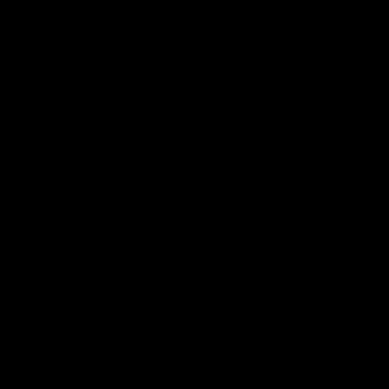

In [35]:
fig, ax = plt.subplots()
camera = Camera(fig)

for i in range(0, ct.shape[2], 1):  # axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5, cmap="autumn")
    ax.text(0.4, 1.0, f"Slice# : {i}", transform=ax.transAxes)
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())